# Notebook 4: Linear Classifiers : On Logistic Regression and Support Vector Machine

#### Conceptualized, organized and prepared by: Christopher Monterola

#### This notebook is based on the following references:

Introduction to Machine Learning with Python, A. Mueller and S. Guido, O'Reilly 2017;
Python Machine Learning, Sebastian Raschka and Vahid Mirjalili;
http://ml-cheatsheet.readthedocs.io/en/latest/logistic_regression.html

## General Idea:  Linear Models for classification

Linear models are also extensively used for classification. Let’s look at binary classification first. In this case, a prediction is made using the following formula:

\begin{align*}
&\hat{y} = w_0 x_0 + w_1 x_1 + \dotsc + w_p x_p + b > threshold 
\end{align*}

The formula looks very similar to the one for linear regression, but instead of just returning the weighted sum of the features, we threshold the predicted value (say at zero). If the function was smaller than zero, we predict the class -1, if it was larger than zero, we predict the class +1.  This prediction rule is common to all linear models for classification. Again, there are many different ways to find the coefficients $\{w[i]\}$ and the intercept $b$.

For linear models for regression, the output $\hat{y}$ was a linear function of the features: a
line, plane, or hyperplane (in higher dimensions). For linear models for classification,
the decision boundary is a linear function of the input. In other words, a (binary) linear
classifier is a classifier that separates two classes using a line, a plane or a hyperplane. We will see examples of that below.


There are many algorithms for learning linear models. These algorithms all differ in the following two ways:

**1.** How they measure how well a particular **combination** of coefficients and intercept fits the training data.

**2.** If and what kind of **regularization** they use.

Different algorithms choose different ways to measure what “fitting the training set
well” means in 1. For technical mathematical reasons, it is not possible to adjust $w$ and
$b$ to minimize the number of misclassifications the algorithms produce, as one might
hope. For our purposes, and many applications, the different choices for *item* **1** (called loss
function) is of little significance.

The two most common linear classification algorithms are **logistic regression**, implemented
in *linear_model.LogisticRegression* and **linear support vector machines**(linear SVMs), implemented in *svm.LinearSVC* (SVC stands for Support Vector Classifier).

Despite its name, **logistic regression** is a classification algorithm and not a regression algorithm, and should not be confused with **linear regression**. We can apply the *LogisticRegression* and *LinearSVC* models to the forge dataset, and visualize the decision boundary as found by the linear models:

# 1. Logistic Regression

In logistic regression the component of $\hat{y}$ is calibrated by assuming that the state of $\hat{y}$ can be separated into say two states [0 (fail) and 1 (success)] using a logistic or a sigmoid function given by:

\begin{equation}
p(z_i) = p(w_i, x_i) = \frac{1}{1 + e^{-\hat{y} (w_i, x_i)}}
\end{equation}


where $\hat{y}=\sum_i(w_i x_i) + b$. One can verify that such a function is a direct solution define by the logarithms of the odds function ($\frac{p}{1-p}$)  or  $logit(p)$ given by:

\begin{equation}
\hat{y}=logit(p) = \log \frac{p}{1-p}
\end{equation}

Here is a good resource on how to interpret the logic of the $logit(p)$:

https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-how-do-i-interpret-odds-ratios-in-logistic-regression/

Note that although it sounds simple now, the history of using such a function for classification is quite rich (below excerpt is taken from: https://en.wikipedia.org/wiki/Logit)  


There have been several efforts to adapt linear regression methods to domain where output is probability value $[0, 1]$ instead of any real number $[-\infty ,+\infty ]$. Many of such efforts focused on modeling this problem by somehow mapping the range $[0, 1]$ to $[-\infty ,+\infty ]$  and then running the linear regression on these transformed values. In 1934 Chester Ittner Bliss used the cumulative normal distribution function to perform this mapping and called his model probit an abbreviation for "probability unit". However, this is computationally more expensive. In 1944, Joseph Berkson used log of odds and called this function logit, abbreviation for "logistic unit" following the analogy for probit. Log odds was used extensively by Charles Sanders Peirce (late 19th century). G. A. Barnard in 1949 coined the commonly used term log-odds; the log-odds of an event is the logit of the probability of the event.



In [1]:
!pip install mglearn

You should consider upgrading via the 'C:\Users\JG\anaconda3\python.exe -m pip install --upgrade pip' command.


In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
import mglearn #library provided by amueller
import pandas as pd
from sklearn.model_selection import train_test_split
pd.options.display.float_format = '{:,.2g}'.format

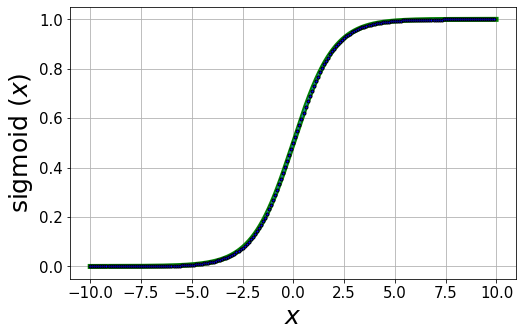

In [3]:
def sigmoid(x, A, x0, k):
    return A/(1+np.exp(-k*(x-x0)))
    
A=1
x0=0
k=1

x1 = np.arange(-10, 10, 0.1)
x2 = np.arange(-10, 10, 0.02)
main_canvas = plt.figure(figsize = (8, 5))
plot_canvas = plt.subplot(1, 1, 1)
plot_canvas.plot(x2, sigmoid(x2, A, x0, k), 'g-', lw = 5)
plot_canvas.plot(x1, sigmoid(x1, A, x0, k), marker = 'o', ms = 3, mew = 1, mfc = "blue", mec = "black")
plot_canvas.grid(True)
#plot_canvas.set_title("Sigmoid", size = 20)
plot_canvas.set_xlabel(r"$x$", size = 25)
plot_canvas.set_ylabel(r"sigmoid $(x)$", size = 25)
plot_canvas.tick_params(axis = "both", which = "both", labelsize = 15)

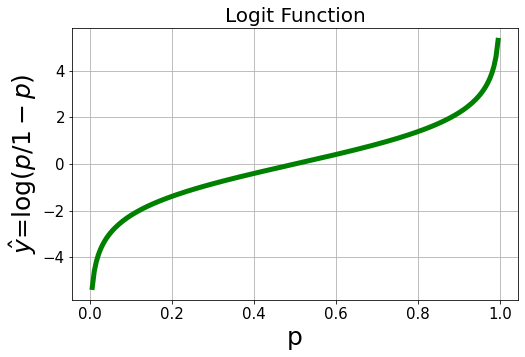

In [4]:
def logit(x):
    return np.log(x) - np.log(1-x)
    



x2 = np.arange(0.005, 1, 0.005)
main_canvas = plt.figure(figsize = (8, 5))
plot_canvas = plt.subplot(1, 1, 1)
plot_canvas.plot(x2, logit(x2), 'g-', lw = 5)

plot_canvas.grid(True)
plot_canvas.set_title("Logit Function", size = 20)
plot_canvas.set_xlabel(r"p", size = 25)
plot_canvas.set_ylabel(r"$\hat{y}$=$\log(p/1-p)$", size = 25)
plot_canvas.tick_params(axis = "both", which = "both", labelsize = 15)

Given in Appendix 1 is a discussion on how the algoritm mathematically proceeds.

The trade-off parameter that determines the strength of the regularization is called $C$ and the **higher values of $C$ correspond to less regularization** (think of $C$ to be inverse of $\alpha$., i.e. $C \sim 1/\alpha$ ).  Meaning, when using a high value of the parameter C *LogisticRegression*  tries to fit the training set as best as possible, while with low values of the parameter C, the model put more emphasis on finding a "compromise" of all the observed values.


# 2. Support vector machines

Another powerful and widely used learning algorithm is the Support Vector
Machine (SVM). In SVMs our optimization objective is to maximize the margin. The margin is defined as the
distance between the separating hyperplane (decision boundary) and the training samples that are closest to this hyperplane, which are the so-called support vectors.

This is illustrated in the following figure:

<img width="972" alt="SVM" src="https://user-images.githubusercontent.com/25600601/112869792-21e2e200-90f0-11eb-9f38-153faf1419cc.png">



Details of the algorithm is described in Appendix 2.

### Regularization using slack variables for SVM

Vladimir Vapnik in 1995 introduce the so-called soft-margin classification, a simple yet brilliant algorithmic innovation. The motivation for introducing the slack variable $\xi$ was that the linear constraints need to be relaxed for nonlinearly separable data to allow the convergence of the optimization in the presence of misclassifications, under appropriate cost penalization. Provided below is an illustration on how variable $C$ controls the penalty for misclassification. Large values of $C$ correspond to large error penalties, whereas we are less strict about
misclassification errors if we choose smaller values for $C$. We can then use the $C$
parameter to control the width of the margin and therefore tune the bias-variance
trade-off, as illustrated in the figure below:


<img width="828" alt="SVM_C" src="https://user-images.githubusercontent.com/25600601/112870165-80a85b80-90f0-11eb-8a42-2f6cafae2826.png">


Again, details of the algorithm is described in Appendix 2.

# Example 1. Forge Data set

In the figure below, we have the first feature of the forge dataset on the x axis and the second feature on the y axis as before. We display the decision boundaries found by *LinearSVC* and *LogisticRegression* respectively as straight lines, separating the area
classified as blue on the top from the area classified as red on the bottom.
In other words, any new data point that lies above the black line will be classified as
blue by the respective classifier, while any point that lies below the black line will be
classified as red.

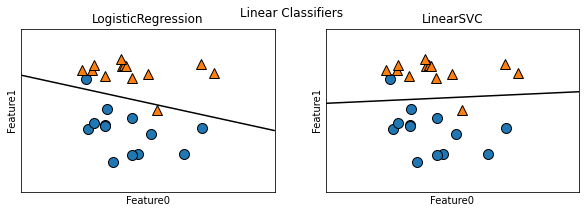

In [5]:
X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

plt.suptitle("Linear Classifiers")

for model, ax in zip([LogisticRegression(), LinearSVC(max_iter=100000)], axes): #default of max_iter=1000 in Python 3.73 sometimes fails to converge
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, ax=ax)
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
    #ax.scatter(X[:, 0], X[:, 1], c=y, s=60, cmap=mglearn.cm2)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature0")
    ax.set_ylabel("Feature1")
#axes[1].legend()

The two models come up with similar decision boundaries. Note that both misclassify two of the points. By default, both models apply an L2 regularization, in the same way that Ridge does for regression.

For LogisticRegression and LinearSVC the trade-off parameter that determines the
strength of the regularization is called C, and **higher values of C correspond to less
regularization**. 

In other words, when using a high value of the parameter $C$, *LogisticRegression* and *LinearSVC* try to fit the training set as best as possible, while with low values of the parameter C, the model put more emphasis on finding a coefficient vector $w$ that is close to zero. 

There is another interesting intuition of how the parameter $C$ acts. Using low values of $C$ will cause the algorithms try to adjust to the “majority” of data points, while using a higher value of $C$ stresses the importance that each individual data point be classified correctly. Here is an illustration using LinearSVC.

Note that this effect is opposite to $\alpha$ previously discussed and for *mathematically intuitive* reason, regularization parameter $C$ in logistic regression and SVM is inverse to parameter $\alpha$ ($C \sim 1/\alpha$) in Lasso and Ridge regression.


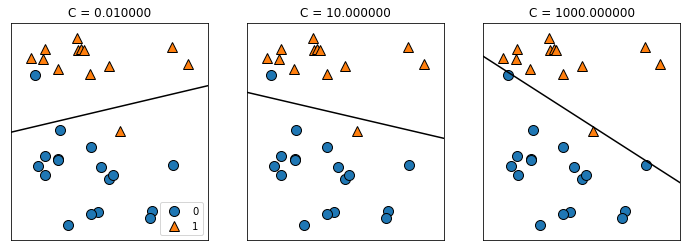

In [6]:
mglearn.plots.plot_linear_svc_regularization()

On the left hand side, we have a very small C corresponding to a lot of regularization.
Most of the red triangle points are at the top, and most of the blue circular points are at the bottom.
The strongly regularized model chooses a relatively horizontal line, misclassifying
two points.

In the center plot, $C$ is slightly higher, and the model focuses more on the two misclassified
samples, tilting the decision boundary. Finally, on the right hand side, a very
high value of $C$ in the model tilts the decision boundary a lot, now correctly classifying
all blue circular points. One of the red triangle points is still misclassified, as it is not possible to
correctly classify all points in this dataset using a straight line. The model illustrated
on the right hand side tries hard to correctly classify all points, but might not capture
the overall layout of the classes well. In other words, this model is likely overfitting.
Similarly to the case of regression, linear models for classification might seem very
restrictive in low dimensional spaces, only allowing for decision boundaries which
are straight lines or planes. Again, in high dimensions, linear models for classification
become very powerful, and guarding against overfitting becomes increasingly important
when considering more features.



# Example 2. Breast cancer dataset

Let us use again the Boston Cancer Data Wisconsin breast cancer dataset (or cancer for
short, read cancer.DESC if you want to learn more), which records clinical measurements of breast cancer tumors. Again, tumor is labeled as “benign” (for harmless tumors) or “malignant” (for cancerous tumors), and
the task is to learn to predict whether a tumor is malignant based on the measurements
of the tissue.

The data can be loaded using the load_breast_cancer from scikit-learn. We will be describing below the results of four ML models namely: 

A. Logistic Regression with L2   
B. Logistic Regression with L1  
C. Support Vector Classification Regression with L2   
D. Support Vector Classification Regression with L1   

## A. Logistic Regression Solution with L2 Regularization

In [7]:
#Get Data 
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()   

#Separate Training and Test Set
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

#Fit using Logistic Regression with C=10
logisticregression = LogisticRegression(C=10000,max_iter=100000).fit(X_train, y_train) 
print("training set score: %f" % logisticregression.score(X_train, y_train))
print("test set score: %f" % logisticregression.score(X_test, y_test))

training set score: 0.985915
test set score: 0.972028


The default value of C=1 provides quite good performance, with 95% accuracy on
both the training and the test set. As training and test set performance are very close,
it is likely that we are underfitting. Let’s try to vary C to fit a more flexible model.

In [8]:
logisticregression100 = LogisticRegression(C=100, max_iter=10000).fit(X_train, y_train)
logisticregression10 = LogisticRegression(C=10, max_iter=10000).fit(X_train, y_train)
logisticregression1 = LogisticRegression(C=1, max_iter=10000).fit(X_train, y_train)
logisticregression01 = LogisticRegression(C=.01, max_iter=10000).fit(X_train, y_train)
logisticregression001 = LogisticRegression(C=.001, max_iter=10000).fit(X_train, y_train)

#print("C =10, training set score: %f" % logisticregression10.score(X_train, y_train))
print("C =.001, train set score: %f" % logisticregression001.score(X_train, y_train))
print("C =.001, test set score: %f \n" % logisticregression001.score(X_test, y_test))

print("C =.01, train set score: %f" % logisticregression01.score(X_train, y_train))
print("C =.01, test set score: %f \n" % logisticregression01.score(X_test, y_test))

print("C =1, train set score: %f" % logisticregression1.score(X_train, y_train))
print("C =1, test set score: %f \n" % logisticregression1.score(X_test, y_test))

print("C =10, train set score: %f" % logisticregression10.score(X_train, y_train))
print("C =10, test set score: %f \n" % logisticregression10.score(X_test, y_test))

print("C =100, train set score: %f" % logisticregression100.score(X_train, y_train))
print("C =100, test set score: %f" % logisticregression100.score(X_test, y_test))

C =.001, train set score: 0.953052
C =.001, test set score: 0.944056 

C =.01, train set score: 0.953052
C =.01, test set score: 0.951049 

C =1, train set score: 0.957746
C =1, test set score: 0.958042 

C =10, train set score: 0.967136
C =10, test set score: 0.965035 

C =100, train set score: 0.983568
C =100, test set score: 0.965035


Using C=10, 100 results in higher training set accuracy, and also a slightly increased test
set accuracy, confirming our intuition that a more complex model should perform
better.

In [9]:
logisticregression01 = LogisticRegression(C=0.01,  max_iter=10000).fit(X_train, y_train)
print("training set score: %f" % logisticregression001.score(X_train, y_train))
print("test set score: %f" % logisticregression001.score(X_test, y_test))

training set score: 0.953052
test set score: 0.944056


As expected, when moving more to the left in Figure model_complexity from an
already underfit model, both training and test set accuracy decrease relative to the
default parameters.

Finally, lets look at the coefficients learned by the models with the three different settings of the regularization parameter C.

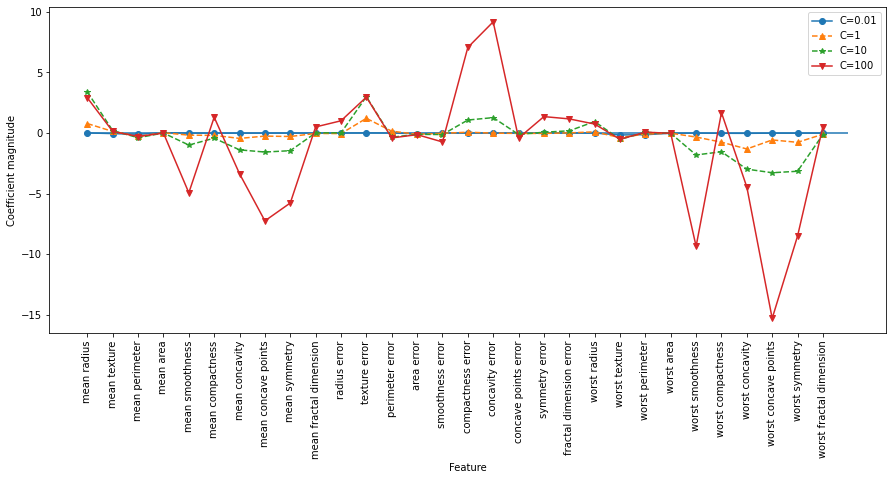

In [10]:
fig = plt.figure(figsize=(15, 6))
#plt.plot(logisticregression001.coef_.T, '-', label="C=0.001")
plt.plot(logisticregression01.coef_.T, '-o', label="C=0.01")
plt.plot(logisticregression1.coef_.T, '--^', label="C=1")
plt.plot(logisticregression10.coef_.T, '--*', label="C=10")
plt.plot(logisticregression100.coef_.T, '-v', label="C=100")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0,0, cancer.data.shape[1])
#plt.ylim(-1, 1)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()

In [11]:
print("Weight of the top predictor = %f" %np.amax(logisticregression10.coef_.T))
print("Top Predictor = %s" %cancer.feature_names[np.argmax(logisticregression10.coef_.T)])

Weight of the top predictor = 3.386827
Top Predictor = mean radius


### Let's have multiple runs (say 20 of different test-training set combinations)

In [12]:
No_trials = 20

all_training = pd.DataFrame()
all_test = pd.DataFrame()
for seedN in range(1,No_trials,1):
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(cancer.data,cancer.target,
                                                        test_size=0.25, random_state=seedN)
    
    training_accuracy = []
    test_accuracy = []
    
    C = [1e-8,1e-5, 1e-3,0.1, 0.2,0.4, 0.75, 1, 1.5, 3, 5, 10, 15,  20, 100, 300,10000]

    for alpha_run in C:
        lr_l2 = LogisticRegression(penalty="l2",C=alpha_run).fit(X_train, y_train)
        training_accuracy.append(lr_l2.score(X_train, y_train))
        test_accuracy.append(lr_l2.score(X_test, y_test))
        #print(alpha_run)
    all_training[seedN]=training_accuracy
    all_test[seedN] = test_accuracy

Highest Test Set Achieved = 0.941848
Best C Parameter = 10.000000


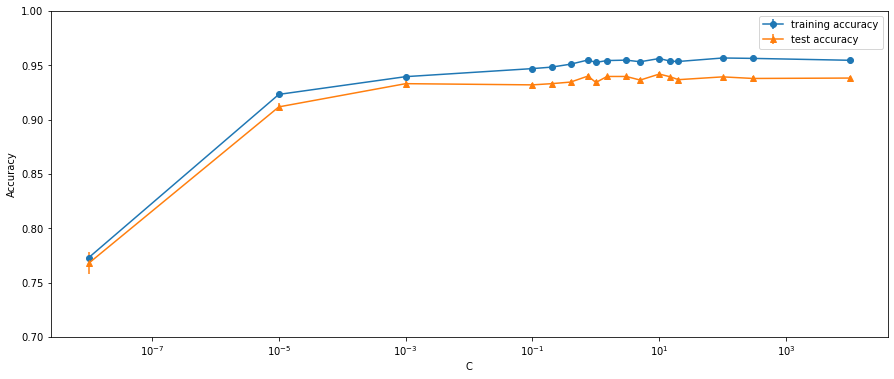

In [13]:
fig = plt.figure(figsize=(15, 6))

plt.xscale('log')
plt.errorbar(C, all_training.mean(axis=1),
             yerr=all_training.var(axis=1), label="training accuracy", marker='o')
plt.errorbar(C, all_test.mean(axis=1), marker='^',
             yerr=5*all_test.var(axis=1), label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("C")
plt.ylim(.7,1)
plt.legend()

print("Highest Test Set Achieved = %f" % np.amax(all_test.mean(axis=1)))
print("Best C Parameter = %f" % C[np.argmax(all_test.mean(axis=1))])

In [14]:
lr_l2 = LogisticRegression(C=C[np.argmax(all_test.mean(axis=1))]).fit(X_train, y_train)

print("Top Predictor = %s" %cancer.feature_names[np.argmax(lr_l2.coef_.T)])
print("Top Predictor Weight of ML with highest prediction = %f" %np.amax(lr_l2 .coef_.T))

display(lr_l2.coef_)


Top Predictor = mean radius
Top Predictor Weight of ML with highest prediction = 0.812783


array([[ 0.8127825 ,  0.50646659,  0.55439306, -0.03589375, -0.03091935,
        -0.13688479, -0.19056026, -0.08187627, -0.03788854, -0.01074576,
         0.01490227,  0.18398479, -0.0012133 , -0.1096087 , -0.00320352,
        -0.0250166 , -0.03637879, -0.01028015, -0.01008513, -0.00243597,
         0.74516267, -0.5431709 , -0.3574598 , -0.00757685, -0.05691682,
        -0.41098211, -0.5103853 , -0.15449489, -0.12399744, -0.04180482]])

As LogisticRegression applies an L2 regularization by default, the result looks similar to Ridge in Figure ridge_coefficients. Stronger regularization (decreasing $C$) pushes coefficients more and more towards zero, though coefficients never become exactly zero. Inspecting the plot more closely, we can also see an interesting effect in the  “worst_compactness”. For C=100, the coefficient is positive, while for C=10,1, 0.01, the coefficient is negative.

Interpreting a model like this, one might think the coefficient tells us which
class a feature is associated with. For example, one might think that a high “worst_compactness“ feature is related to a sample being “malignant”. However, the change of sign in the coefficient for “worst_compactness“ means that depending on which model we look at, high “worst_compactness“  could be either taken as being indicative of “benign” or indicative of “malignant”. This illustrates that interpretations of coefficients of linear models should always be taken with a grain of salt.


## B. Logistic Regression with L1 Regularization

If we desire a more interpretable model, using L1 regularization might help, as it limits the model to only using a few features. Here is the coefficient plot and classification accuracies for L1 regularization:

some notes:
 - solver = 'liblinear' because L1 regularization may not converge if you use the default solver

train accuracy of L1 logreg with C=0.010000: 0.910798
test accuracy of L1 logreg with C=0.010000: 0.944056 

train accuracy of L1 logreg with C=0.100000: 0.934272
test accuracy of L1 logreg with C=0.100000: 0.930070 

train accuracy of L1 logreg with C=1.000000: 0.964789
test accuracy of L1 logreg with C=1.000000: 0.944056 

train accuracy of L1 logreg with C=100.000000: 0.988263
test accuracy of L1 logreg with C=100.000000: 0.951049 



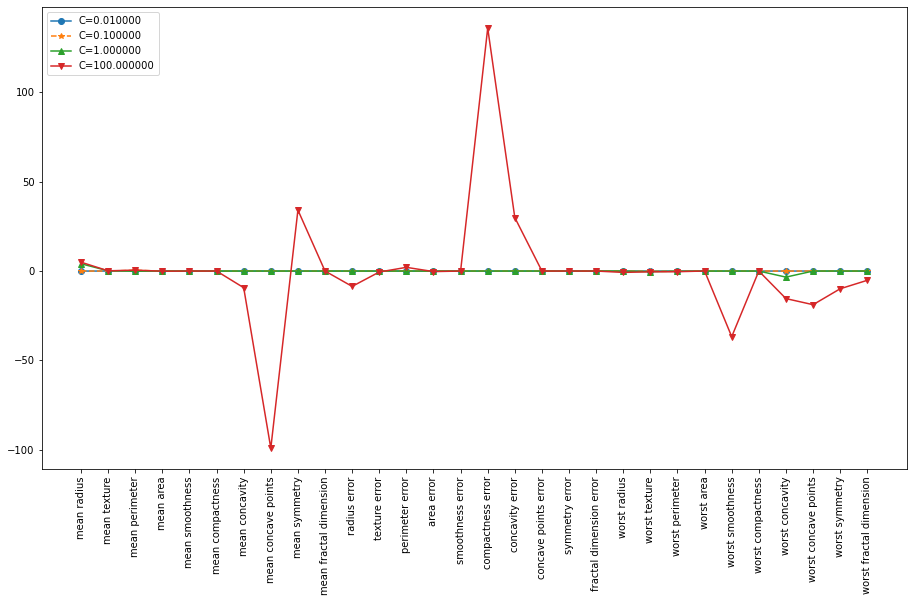

In [15]:
plt.figure(figsize= (15.5, 8.5))

for C,marker in zip([.01,.1, 1, 100],['-o','--*','-^','-v','--o']):
    lr_l1 = LogisticRegression(C=C, penalty="l1", solver='liblinear').fit(X_train, y_train)
    print("train accuracy of L1 logreg with C=%f: %f"
    % (C, lr_l1.score(X_train, y_train)))
    print("test accuracy of L1 logreg with C=%f: %f \n"
    % (C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C=%f" % C)

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
#plt.ylim(-1, 1)
plt.legend(loc=2)

In [16]:

logisticregression100 = LogisticRegression(C=100, penalty="l1", solver='liblinear').fit(X_train, y_train)
print("Top Predictor Weight = %f" %np.amax(logisticregression100.coef_.T))
print("Top Predictor = %s" %cancer.feature_names[np.argmax(logisticregression100.coef_.T)])

Top Predictor Weight = 114.916168
Top Predictor = compactness error


Again, notice how the mean_perimeter changes sign, an area for possible misinterpretation.

### Multiple runs of training-testing sets (trials = 20)

In [17]:
No_trials = 20

lahat_training = pd.DataFrame()
lahat_test = pd.DataFrame()
for seedN in range(1,No_trials,1):
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(cancer.data,cancer.target,
                                                        test_size=0.25, random_state=seedN)
    
    training_accuracy = []
    test_accuracy = []
    
    C = [1e-8, 1e-4, 1e-3,0.1, 0.2,0.4, 0.75, 1, 1.5, 3, 5, 10, 15,  20, 100, 300, 1000, 5000]

    for alpha_run in C:
        
        lr_l1 = LogisticRegression(C=alpha_run, penalty="l1", solver='liblinear').fit(X_train, y_train)
        training_accuracy.append(lr_l1.score(X_train, y_train))
        test_accuracy.append(lr_l1.score(X_test, y_test))
            
    lahat_training[seedN]=training_accuracy
    lahat_test[seedN] = test_accuracy

Highest Test Set Achieved = 0.959514
Best C Parameter = 100.000000


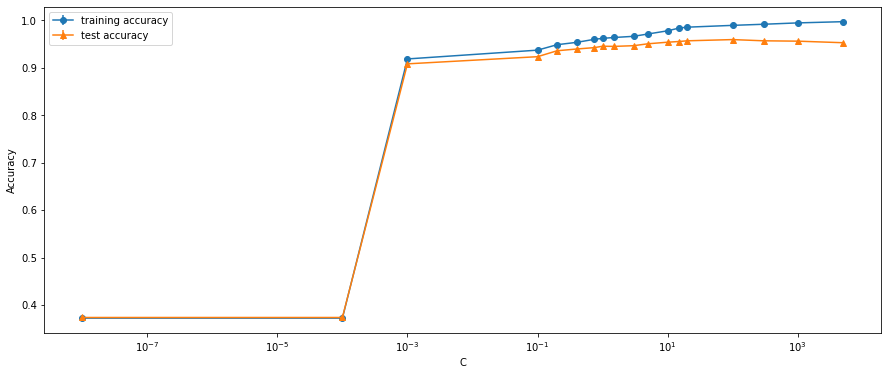

In [18]:
fig = plt.figure(figsize=(15, 6))

plt.xscale('log')
plt.errorbar(C, lahat_training.mean(axis=1),
             yerr=lahat_training.var(axis=1), label="training accuracy", marker='o')
plt.errorbar(C, lahat_test.mean(axis=1), marker='^',
             yerr=lahat_test.var(axis=1), label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("C")
#plt.ylim(.9,1)
plt.legend()
print("Highest Test Set Achieved = %f" % np.amax(lahat_test.mean(axis=1)))
print("Best C Parameter = %f" % C[np.argmax(lahat_test.mean(axis=1))])

In [19]:
lr_l1 = LogisticRegression(C=C[np.argmax(lahat_test.mean(axis=1))], penalty="l1", solver='liblinear').fit(X_train, y_train)

print("Top Predictor = %s" %cancer.feature_names[np.argmax(lr_l1.coef_.T)])
print("Top Predictor Weight of ML with highest prediction = %f" %np.amax(lr_l1 .coef_.T))


Top Predictor = compactness error
Top Predictor Weight of ML with highest prediction = 113.004445


## C. Support Vector machine with L2 regularization

In [20]:
No_trials =20

from sklearn.svm import LinearSVC

lahat_training = pd.DataFrame()
lahat_test = pd.DataFrame()
for seedN in range(1,No_trials,1):
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(cancer.data,cancer.target, 
                                                        test_size=0.25, random_state=seedN)
    
    training_accuracy = []
    test_accuracy = []
  
    C = [1e-8, 1e-4, 1e-3,0.1, 0.2,0.4, 0.75, 1, 1.5, 3, 5, 10, 15,  20, 100, 300, 1000, 5000]

    for alpha_run in C:
        svm_l2 = LinearSVC(C=alpha_run, penalty="l2").fit(X_train, y_train)
        training_accuracy.append(svm_l2.score(X_train, y_train))
        test_accuracy.append(svm_l2.score(X_test, y_test))
     
    lahat_training[seedN]=training_accuracy
    lahat_test[seedN] = test_accuracy


Highest Test Set Achieved = 0.920132
Best C Parameter = 0.000100


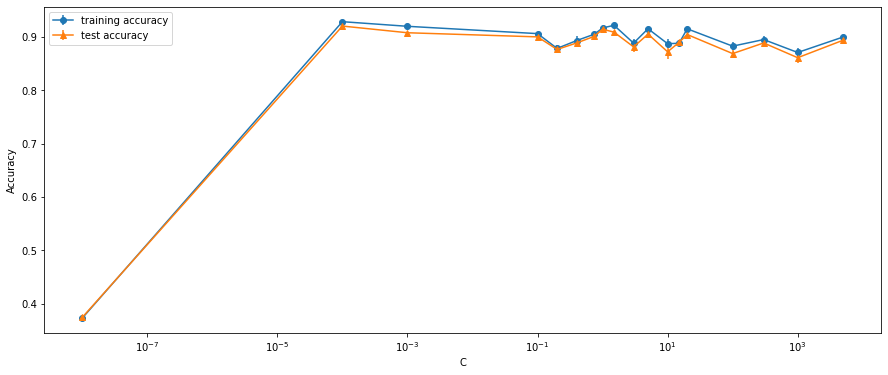

In [21]:
fig = plt.figure(figsize=(15, 6))

plt.xscale('log')
plt.errorbar(C, lahat_training.mean(axis=1),
             yerr=lahat_training.var(axis=1), label="training accuracy", marker='o')
plt.errorbar(C, lahat_test.mean(axis=1), marker='^',
             yerr=lahat_test.var(axis=1), label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("C")
#plt.ylim(.7,1)
plt.legend()

print("Highest Test Set Achieved = %f" % np.amax(lahat_test.mean(axis=1)))
print("Best C Parameter = %f" % C[np.argmax(lahat_test.mean(axis=1))])

In [22]:
svm_l2 = LinearSVC(C=C[np.argmax(lahat_test.mean(axis=1))], penalty="l2").fit(X_train, y_train)

print("Top Predictor = %s" %cancer.feature_names[np.argmax(svm_l2.coef_.T)])
print("Top Predictor Weight of ML with highest prediction = %f" %np.amax(svm_l2 .coef_.T))


Top Predictor = mean perimeter
Top Predictor Weight of ML with highest prediction = 0.035798


train accuracy of L2 logreg with C=0.000100: 0.920188
test accuracy of L2 logreg with C=0.000100: 0.937063 

train accuracy of L2 logreg with C=0.010000: 0.896714
test accuracy of L2 logreg with C=0.010000: 0.881119 

train accuracy of L2 logreg with C=1.000000: 0.927230
test accuracy of L2 logreg with C=1.000000: 0.937063 

train accuracy of L2 logreg with C=100.000000: 0.899061
test accuracy of L2 logreg with C=100.000000: 0.902098 

Top Predictor Value= 0.078918
Top Predictor = mean perimeter


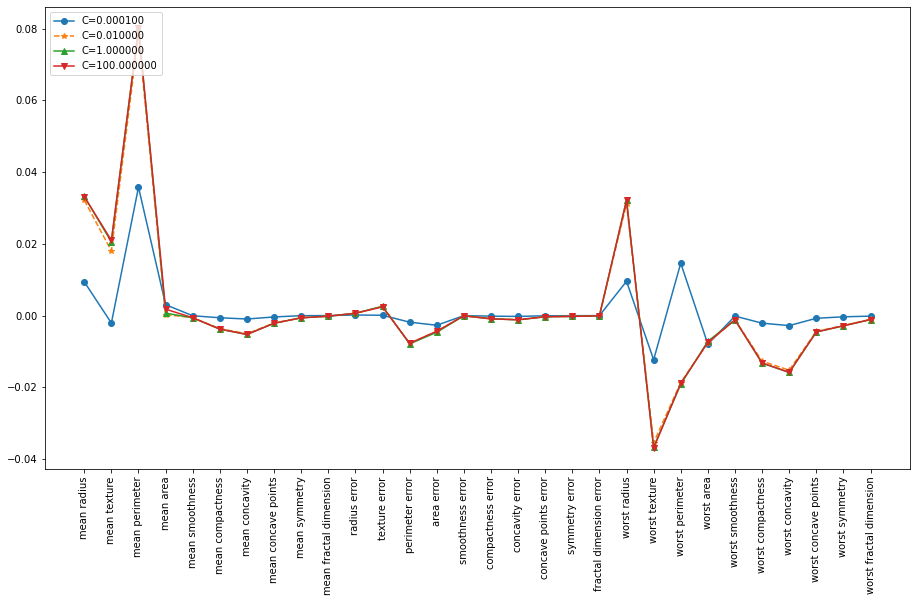

In [23]:
plt.figure(figsize= (15.5, 8.5))

for C,marker in zip([.0001,.01, 1, 100],['-o','--*','-^','-v']):
    lsvc_l2 = LinearSVC(C=C, penalty="l2").fit(X_train, y_train)
    print("train accuracy of L2 logreg with C=%f: %f"
    % (C, lsvc_l2.score(X_train, y_train)))
    print("test accuracy of L2 logreg with C=%f: %f \n"
    % (C, lsvc_l2.score(X_test, y_test)))
    plt.plot(lsvc_l2.coef_.T, marker, label="C=%f" % C)

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
#plt.ylim(-1, 1)
plt.legend(loc=2)

linearSVC01 = LinearSVC(C=.01, penalty="l2").fit(X_train, y_train)
print("Top Predictor Value= %f" %np.amax(linearSVC01.coef_.T))
print("Top Predictor = %s" %cancer.feature_names[np.argmax(linearSVC01.coef_.T)])

## D. Support Vector machine L1 regularization

In [24]:
No_trials=20

from sklearn.svm import LinearSVC

lahat_training = pd.DataFrame()
lahat_test = pd.DataFrame()
for seedN in range(1,No_trials,1):
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(cancer.data,cancer.target,
                                                        test_size=0.25, random_state=seedN)
    
    #X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
    training_accuracy = []
    test_accuracy = []
    #neighbors_settings = range(1, 100) # try n_neighbors from 1 to 50

    C = [1e-4, 1e-3,0.1, 0.2,0.4, 0.75, 1, 1.5, 3, 5, 10, 15,  20, 100, 300, 1000, 5000]

    for alpha_run in C:

        svm_l1 = LinearSVC(C=alpha_run, penalty="l1", loss='squared_hinge', dual=False).fit(X_train, y_train)
        training_accuracy.append(svm_l1.score(X_train, y_train))
        test_accuracy.append(svm_l1.score(X_test, y_test))

    
    lahat_training[seedN]=training_accuracy
    lahat_test[seedN] = test_accuracy

Highest Test Set Achieved = 0.964299
Best C Parameter = 10.000000


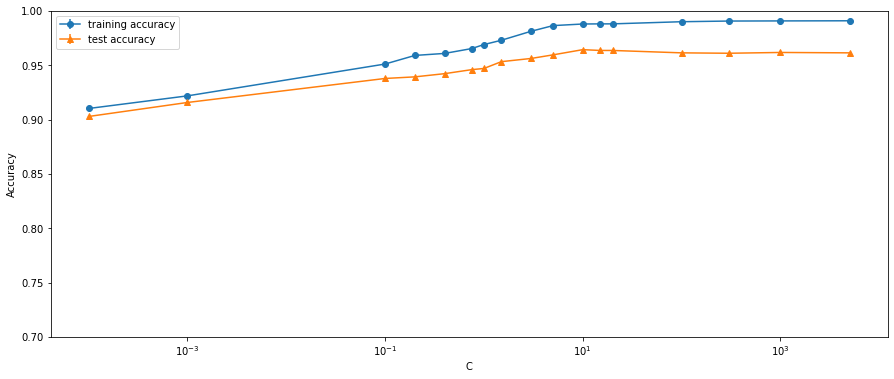

In [25]:
fig = plt.figure(figsize=(15, 6))

plt.xscale('log')
plt.errorbar(C, lahat_training.mean(axis=1),
             yerr=lahat_training.var(axis=1), label="training accuracy", marker='o')
plt.errorbar(C, lahat_test.mean(axis=1), marker='^',
             yerr=lahat_test.var(axis=1), label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("C")
plt.ylim(.7,1)
plt.legend()

print("Highest Test Set Achieved = %f" % np.amax(lahat_test.mean(axis=1)))
print("Best C Parameter = %f" % C[np.argmax(lahat_test.mean(axis=1))])

In [26]:
svm_l1 = LinearSVC(C=C[np.argmax(lahat_test.mean(axis=1))], penalty="l1", loss='squared_hinge', dual=False).fit(X_train, y_train)

print("Top Predictor = %s" %cancer.feature_names[np.argmax(svm_l1.coef_.T)])
print("Top Predictor Weight of ML with highest prediction = %f" %np.amax(svm_l1 .coef_.T))


Top Predictor = compactness error
Top Predictor Weight of ML with highest prediction = 15.386171


training accuracy of L1 logreg with C=0.000010: 0.361502
test accuracy of L1 logreg with C=0.000010: 0.405594 

training accuracy of L1 logreg with C=0.010000: 0.927230
test accuracy of L1 logreg with C=0.010000: 0.930070 

training accuracy of L1 logreg with C=1.000000: 0.971831
test accuracy of L1 logreg with C=1.000000: 0.951049 

training accuracy of L1 logreg with C=10.000000: 0.988263
test accuracy of L1 logreg with C=10.000000: 0.965035 

training accuracy of L1 logreg with C=100.000000: 0.990610
test accuracy of L1 logreg with C=100.000000: 0.965035 

Top Predictor weight = 0.069783
Top Predictor = mean perimeter


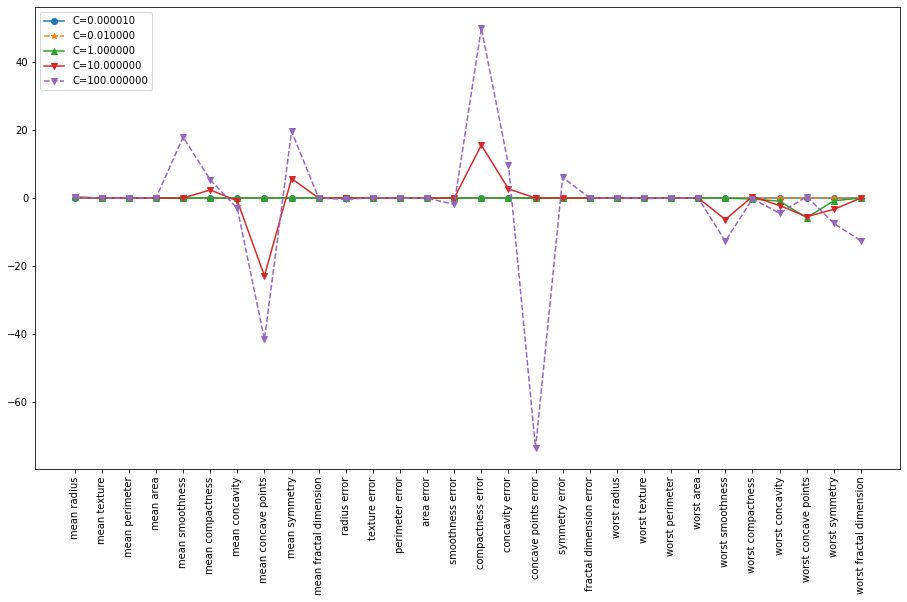

In [27]:
plt.figure(figsize= (15.5, 8.5))

for C,marker in zip([.00001,.01, 1, 10, 100],['-o','--*','-^','-v', '--v']):
    lsvc_l1 = LinearSVC(C=C, penalty="l1",loss='squared_hinge', dual=False).fit(X_train, y_train)
    print("training accuracy of L1 logreg with C=%f: %f"
    % (C, lsvc_l1.score(X_train, y_train)))
    print("test accuracy of L1 logreg with C=%f: %f \n"
    % (C, lsvc_l1.score(X_test, y_test)))
    plt.plot(lsvc_l1.coef_.T, marker, label="C=%f" % C)

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
#plt.ylim(-.5, .5)
plt.legend(loc=2)

linearSVC01 = LinearSVC(C=.01, penalty="l1",dual=False).fit(X_train, y_train)
print("Top Predictor weight = %f" %np.amax(linearSVC01.coef_.T))
print("Top Predictor = %s" %cancer.feature_names[np.argmax(linearSVC01.coef_.T)])


## E. Comparing Methods. 
For comparison, see below the result of the kNN classification method previously described with methods A-D.

In [28]:
from sklearn.neighbors import KNeighborsClassifier

lahat_training = pd.DataFrame()
lahat_test = pd.DataFrame()
for seedN in range(1,50,1):
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(cancer.data,cancer.target, 
                                                        test_size=0.25, random_state=seedN)

    training_accuracy = []
    test_accuracy = []
    neighbors_settings = range(1, 50) # try n_neighbors from 1 to 50

    for n_neighbors in neighbors_settings:   
        clf = KNeighborsClassifier(n_neighbors=n_neighbors)  # build the model
        clf.fit(X_train, y_train)

        training_accuracy.append(clf.score(X_train, y_train)) # record training set accuracy
        test_accuracy.append(clf.score(X_test, y_test))   # record generalization accuracy
    
    lahat_training[seedN]=training_accuracy
    lahat_test[seedN] = test_accuracy

Highest Test Set Achieved = 0.934922
Best Nearest Neighbor Parameter = 8


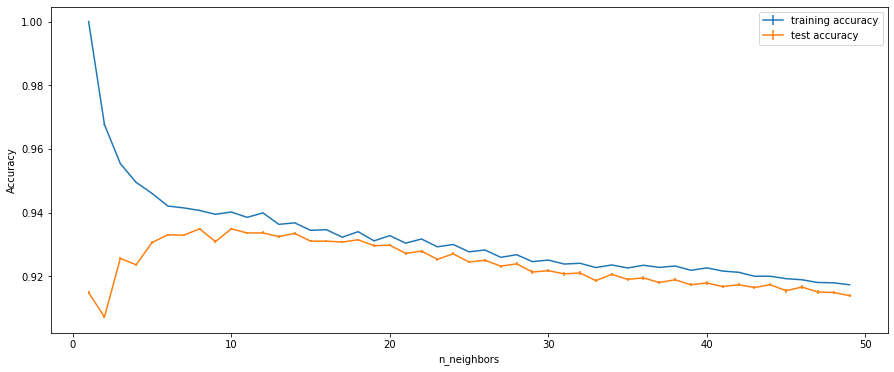

In [29]:
    
fig = plt.figure(figsize=(15, 6))
plt.errorbar(neighbors_settings, lahat_training.mean(axis=1),
             yerr=lahat_training.var(axis=1), label="training accuracy")
plt.errorbar(neighbors_settings, lahat_test.mean(axis=1),
             yerr=lahat_test.var(axis=1), label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

n_neighbor_best= np.argmax(lahat_test.mean(axis=1)) +1
print("Highest Test Set Achieved = %f" % np.amax(lahat_test.mean(axis=1)))
print("Best Nearest Neighbor Parameter = %d" %n_neighbor_best)




<center>
    <h2>SUMMARY OF RESULTS</h2>
</center>

|Machine Learning Method| Test Accuracy | Best Parameter | Top Predictor Variable
| :---: | :---: | :----: |:---:|
| kNN | 93.49% | N_Neighbor = 8| NA
| Logistic (L2) | 94.15% |C=300| mean radius
| Logistic (L1) |96.02% | C=100 | compactness error
| Linear SVM (L2) |92.09% | C=0.0001 | mean Perimeter
| Linear SVM(L1) | 96.39%| C=10 |compactness error




#### In the next few lessons, we will automate the creation of the above table.

# 3. The Confusion Matrix

In the previous notebooks, we evaluated our models using model accuracy, which is a useful metric with which to quantify the performance of a model in general. However, there are several other performance metrics that can be used to measure a model's relevance, such as precision, recall, and the F1-score.

Before we get into the details of different scoring metrics, let's take a look at a confusion matrix, a matrix that lays out the performance of a learning algorithm. The confusion matrix is simply a square matrix that reports the counts of the True positive (TP), True negative (TN), False positive (FP), and False negative (FN)
predictions of a classifier, as shown in the following figure:

<img width="400" alt="ConfusionMatrix" src="https://user-images.githubusercontent.com/25600601/112871501-e6491780-90f1-11eb-87aa-22825579c211.png">


Although these metrics can be easily computed manually by comparing the true and
predicted class labels, scikit-learn provides a convenient confusion_matrix function
that we can use, as shown in the next line

The following are the performance metrics that accompanied confusion matrix:

1. Precision ($PRE$) or positive predictive value

\begin{equation}
PRE = \frac{TP}{TP+FP}
\end{equation}

2. Recall ($REC$) or sensitivity

\begin{equation}
REC = \frac{TP}{TP+FN}
\end{equation}

3. F1 score ($F1-Score$): Combination of $PRE$ and $REC$

\begin{equation}
F1-Score = 2 \frac{PRE \times REC}{PRE + REC}
\end{equation}


In simple terms, high precision means that an algorithm returned substantially more relevant results than irrelevant ones, while high recall means that an algorithm returned most of the relevant results. see: https://en.wikipedia.org/wiki/Precision_and_recall 

Case in point as illustrated in the above wikipedia: When a search engine returns 30 pages only 20 of which were relevant while failing to return 40 additional relevant pages, its precision is 20 (TP)/30 (TP + FP) = 2/3 while its recall is 20 (TP)/60 (TP + FN) = 1/3. 

So, in this case, **precision** is "**how useful the search results are**", and **recall** is "**how complete the results are**".


In [30]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cancer.data,cancer.target, stratify=cancer.target, 
                                                        test_size=0.25, random_state=1)

lsvc_l1 = LinearSVC(C=300, penalty="l1",loss='squared_hinge', dual=False).fit(X_train, y_train)
lsvc_l1.fit(X_train, y_train)
y_pred = lsvc_l1.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

[[51  2]
 [ 1 89]]


which we can prettify as follows:

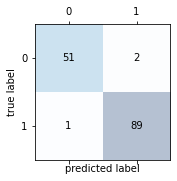

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        53
           1       0.98      0.99      0.98        90

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [31]:
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

# 4. Highlights: Strengths, weaknesses and parameters

**Point 1.** The main parameter of linear models is the regularization parameter, called **alpha** or $\alpha$ in
the regression models and $C$ in LinearSVC and LogisticRegression. Large **alpha** or
small $C$ means simpler models. In particular for the regression models, tuning this
parameter is quite important. Usually $C$ and **alpha** are searched using a logarithmic scale search space.

**Point 2.** The other decision you have to make is whether you want to use L1 regularization or
L2 regularization. If you assume that only few of your features are actually important,
you should use L1. Otherwise, you should default to L2. L1 can also be useful if interpretability of the model is important. As L1 will use only a few features, it is easier to explain which features are important to the model, and what the effect of these features is. L1 however is more computationally expensive and hence longer time is needed for training.

**Point 3.** Linear models are very fast to train, and also fast to predict. They scale to very large
datasets and work well with sparse data. If your data consists of hundreds of thousands
or millions of samples, you might want to investigate **SGDClassifier** and
**SGDRegressor**, which implement even more scalable versions of the linear models
described above.

**Point 4.** Another strength of linear models is that they make it relatively easy to understand
how a prediction is made. Unfortunately, it is often not entirely clear why coefficients are the way they are. This is particularly true if your dataset has highly correlated features; in these cases, the coefficients might be hard to interpret.

**Point 5.** Linear models with proper regularization often perform well when the number of features is large compared to the number of samples. They are also often used on very large datasets, simply because other models are not feasible to train. 

# Appendix: Mathematics and Algorithmic Implementation of Logistic Regression and Support Vector Machine

# Appendix 1. On Logistic Regression: Algorithmic implementation

By doing proper normalisation of the inputs (mean =0) we can set $b=0$. The cost function to be minimized with respect to $w_i$ is given by:

\begin{equation}
J(w_i) = \sum_i \frac{1}{2}(p(w_i, x_i)-y_i)^2
\end{equation}

And apply gradient-descent and update the weights using:

\begin{equation}
w_i^{t=1} = w_i^{t=0} -\eta \frac{\partial J(w_i^{t=0})}{\partial w_i}
\end{equation}

Unfortunately we can’t (or at least shouldn’t) use the above cost function as we did for linear regression. Why? There is a great math explanation for such but let's just say that the prediction function is non-linear (due to sigmoid transform). Squaring this prediction as we do in MSE results in a non-convex function with many local minimums. If our cost function has many local minimums, gradient descent may not find the optimal global minimum.



An alternative way of looking at the procedure is to maximise the separation of the successful state y=1 vs the state y=0 by defining a likehood function $\Lambda$ (as discussed in ACS):

\begin{equation}
\Lambda (\mathbf{w}) = P(\mathbf{y}|\mathbf{w}, \mathbf{x})= \prod_i P(y_i|\mathbf{w}, x_i) =\prod_i p(z_i)^{y_i} (1-p(z_i))^{1-y_i}
\end{equation}

here we assumed that all the samples are independent. In practice it is easier to **maximize** the log of this equation, which is called the log-likehood of this function:

\begin{equation}
l(\mathbf{w})=\log(\Lambda (\mathbf{w}))=\sum_i[y_i\log(p(z_i)) + (1-y_i)log(1-p(z_i))]
\end{equation}



or we can **minimize** this function by defining the cost function as:

\begin{equation}
l(\mathbf{w})=-\sum_i[y_i\log(p(z_i)) + (1-y_i)log(1-p(z_i))]
\end{equation}

Note that instead of Mean Squared Error, the above cost function is called Cross-Entropy, also known as Log Loss. Cross-entropy loss can be divided into two separate cost functions: one for $y$=1 [$y_i\log(p(z_i)$] and one for $y$=0 [$(1-y_i)log(1-p(z_i)$].

The trade-off parameter that determines the strength of the regularization is called $C$ and the **higher values of $C$ correspond to less regularization**.  Note that this is consistent with regularisation idea in Ridge and Lasso regression that uses $\alpha$ directly. The reason for defining such in python is for consistency with the Support Vector Machine method that we will be describing next.

Again, when using a high value of the parameter C (or low $\alpha$), *LogisticRegression* (and as will be shown *LinearSVC*) tries to fit the training set as best as possible, while with low values of the parameter C (or high $\alpha$), the model put more emphasis on finding a coefficient vector $w$ that is close to zero.


# Appendix 2: On Support Vector Machine: Formulation

### Maximum margin intuition 

The rationale behind having decision boundaries with large margins is that they tend to have a lower generalization error whereas models with small margins are more prone to overfitting. To get an idea of the margin maximization, let's take a closer look at those positive and negative hyperplanes that are parallel to the decision boundary, which can be expressed as follows:

<img width="972" alt="SVM" src="https://user-images.githubusercontent.com/25600601/112869792-21e2e200-90f0-11eb-9f38-153faf1419cc.png">


\begin{equation}
b + \mathbf{w}^T \mathbf{x}_{pos} =1
\end{equation}

\begin{equation}
b + \mathbf{w}^T \mathbf{x}_{neg} =-1
\end{equation}

If we subtract the above linear equations from each other, we get:

\begin{equation}
\mathbf{w}^T (\mathbf{x}_{pos} -\mathbf{x}_{neg}) = 2
\end{equation}

We can normalize this equation by the length of the vector $\mathbf{w}$, which is defined
as follows:

\begin{equation}
\mathbf{||w||}=\sqrt{\sum_j w_i^2}
\end{equation}

So we arrive at the following equation:

\begin{equation}
\frac{\mathbf{w}^T (\mathbf{x}_{pos} -\mathbf{x}_{neg})}{\mathbf{||w||}} = \frac{2}{\mathbf{||w||}}
\end{equation}

The left side of the preceding equation can then be interpreted as the distance
between the positive and negative hyperplane, which is the so-called *margin* that we
want to **maximize**.   


Now, the objective function of the SVM becomes the maximization of this *margin* by
**maximizing** $\frac{2}{\mathbf{||w||}}$ under the constraint that the samples are classified correctly, which
can be written as:

\begin{equation}
b + \mathbf{w}^T \mathbf{x}_{i} \geq 1 \: if \: y_i=1
\end{equation}


\begin{equation}
b + \mathbf{w}^T \mathbf{x}_{i} \leq -1 \: if \: y_i= -1
\end{equation}

for i =1…N where N is the number of samples in our dataset.

These two equations basically say that all negative samples should fall on one side of the negative hyperplane, whereas all the positive samples should fall behind the positive hyperplane, which can also be written more compactly as follows:

\begin{equation}
y_i(b + \mathbf{w}^T \mathbf{x}_{i}) \geq 1 \: for\: all\: i
\end{equation}

In practice though, it is easier to **minimize** the reciprocal term $\frac{1}{2} \mathbf{||w||}^2$, 
which can be solved by *quadratic programming*. However, a detailed discussion about quadratic
programming is beyond the scope of this lecture and our reference books. You can learn more about support
vector machines in The Nature of Statistical Learning Theory, Springer Science+Business
Media, Vladimir Vapnik, 2000 or Chris J.C. Burges' excellent explanation in A Tutorial
on Support Vector Machines for Pattern Recognition (Data Mining and Knowledge
Discovery, 2(2): 121-167, 1998).



### Regularization using slack variables for SVM

Vladimir Vapnik in 1995 instroduce the so-called soft-margin classification. The motivation for introducing the slack variable $xi$ was that the linear constraints need to be relaxed for nonlinearly separable data to allow the convergence of the optimization in the presence of misclassifications, under appropriate cost penalization.
The positive-values slack variable is simply added to the linear constraints:

\begin{equation}
b + \mathbf{w}^T \mathbf{x}_{i} \geq 1 - \xi_i \: if \: y_i=1
\end{equation}

\begin{equation}
b + \mathbf{w}^T \mathbf{x}_{i} \leq -1 + \xi_i \: if \: y_i= -1
\end{equation}

for i =1…N
The new objective to be minimized (subject to the constraints) becomes:

\begin{equation}
\frac{1}{2} \mathbf{||w||}^2 + C (\sum_i \xi_i)
\end{equation}


via the variable $C$. We can then control the penalty for misclassification. Large
values of $C$ correspond to large error penalties, whereas we are less strict about
misclassification errors if we choose smaller values for $C$. We can then use the $C$
parameter to control the width of the margin and therefore tune the bias-variance
trade-off, as illustrated in the figure below:

<img width="828" alt="SVM_C" src="https://user-images.githubusercontent.com/25600601/112870165-80a85b80-90f0-11eb-8a42-2f6cafae2826.png">




-----------------OVERFITTING(less regularized)-----------------------------------------------UNDERFITTING (more regularized)-------------------

# Appendix 3: Linear Models for multiclass Classification


Many linear classification models are binary models, and don’t extend naturally to the
multi-class case (with the exception of Logistic regression). A common technique to
extend a binary classification algorithm to a multi-class classification algorithm is the
one-vs-rest approach. In the one-vs-rest approach, a binary model is learned for each
class, which tries to separate this class from all of the other classes, resulting in as
many binary models as there are classes.


To make a prediction, all binary classifiers are run on a test point. The classifier that
has the highest score on its single class “wins” and this class label is returned as prediction.
Having one binary classifier per class results in having one vector of coefficients $w$
and one intercept $b$ for each class. The class for which the result of formula

\begin{align*}
& w[0] x[0] + w[1] x[1] + \dotsc + w[p] * x[p] + b & \text{ (3) classification confidence}
\end{align*}

is highest is the assigned class label.

The mathematics behind logistic regression are somewhat different from the one-vs-rest
approach, but they also result in one coefficient vector and intercept per class,
and the same method of making a prediction is applied.
Let’s apply the one-vs-rest method to a simple three-class classification dataset.


## Example 3. Synthetic Blobs

We use a two-dimensional dataset, where each class is given by data sampled from a Gaussian distribution.

Text(0.5, 0, 'Feature 2')

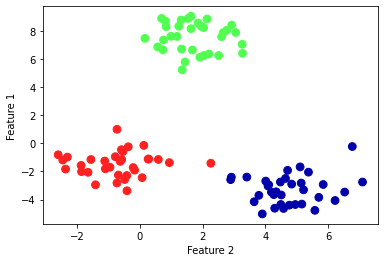

In [32]:
from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=143)
plt.scatter(X[:, 0], X[:, 1], c=y, s=60, cmap=mglearn.cm3)

plt.ylabel("Feature 1")
plt.xlabel("Feature 2")

Now, we train a LogisticRegression classifier on the dataset. 

In [33]:
logistic_Reg = LogisticRegression().fit(X, y)
print(logistic_Reg.coef_.shape)
print(logistic_Reg.coef_) #weights for feature1, feature2 for each of the three classes 1,2,3
print(logistic_Reg.intercept_.shape)
print(logistic_Reg.intercept_) #intercept for each of the three classes 1,2,3

(3, 2)
[[ 0.99663083 -0.73459639]
 [-1.04244362 -0.2210852 ]
 [ 0.04581279  0.95568159]]
(3,)
[-2.32312459  3.27670731 -0.95358272]


OR, we train a LinearSVC classifier on the dataset. 

In [34]:
linear_svm = LinearSVC().fit(X, y)
print(linear_svm.coef_.shape)
print(linear_svm.coef_) # w1, w2 for each of the three classes 1,2,3
print(linear_svm.intercept_.shape)
print(linear_svm.intercept_) # b1, b2

(3, 2)
[[ 0.51103879 -0.19601882]
 [-0.76439746 -0.23187523]
 [ 0.00696073  0.34077162]]
(3,)
[-1.39273679  1.03127559 -0.90267646]


We see that the shape of the coef_ is (3, 2), meaning that each row of coef_ contains
the coefficient vector for one of the three classes. Each row has two entries, corresponding
to the two features in the dataset.
The intercept_ is now a one-dimensional array, storing the intercepts for each class.
Let’s visualize the lines given by the three binary classifiers:

(3, 2)
[[ 0.99663083 -0.73459639]
 [-1.04244362 -0.2210852 ]
 [ 0.04581279  0.95568159]]
[-2.32312459  3.27670731 -0.95358272]


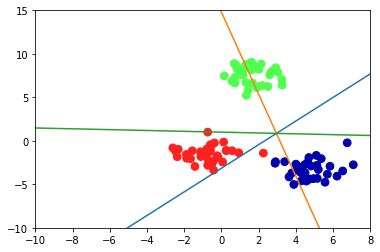

In [35]:
logistic_Reg = LogisticRegression().fit(X, y)
print(logistic_Reg.coef_.shape)
print(logistic_Reg.coef_) # w1, w2 for each of the three classes 1,2,3
print(logistic_Reg.intercept_) # intercepts for each of the three classes 1,2,3


plt.scatter(X[:, 0], X[:, 1], c=y, s=60, cmap=mglearn.cm3)
line = np.linspace(-15, 15)
for coef, intercept in zip(logistic_Reg.coef_, logistic_Reg.intercept_):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1]) #Can you explain the formula here?
    plt.ylim(-10, 15)
    plt.xlim(-10, 8)

(3, 2)
[[ 0.5110418  -0.19601026]
 [-0.76439112 -0.23188118]
 [ 0.00696348  0.34078231]]
(3,)
[-1.39273763  1.03127733 -0.90267059]


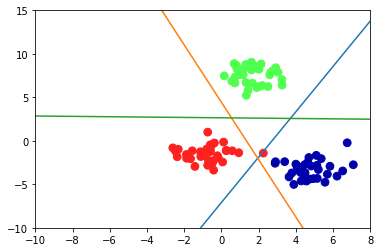

In [36]:
linear_svm = LinearSVC().fit(X, y)
print(linear_svm.coef_.shape)
print(linear_svm.coef_) #w1, w2 for each of the three classes 1,2,3
print(linear_svm.intercept_.shape)
print(linear_svm.intercept_) #b1, b2, b3

plt.scatter(X[:, 0], X[:, 1], c=y, s=60, cmap=mglearn.cm3)
line = np.linspace(-15, 15)
for coef, intercept in zip(linear_svm.coef_, linear_svm.intercept_):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1])
    plt.ylim(-10, 15)
    plt.xlim(-10, 8)

The red (or sometimes displayed as orange) line shows the decision boundary for the binary classifier for the red class,
and so on.

You can see that all the red points in the training data are below the red line, which
means they are on the “red” side of this binary classifier. The red points are left of the
green line, which means they are classified as “rest” by the binary classifier for the
green class. The red points are below the blue line, which means the binary classifier
for the blue class also classifies them as “rest”. Therefore, any point in this area will be classified as red by the final classifier (Formula (3) of the red classifier is greater than zero, while it is smaller than zero for the other two classes).
But what about the triangle in the middle of the plot? All three binary classifiers classify points there as “rest”. Which class would a point there be assigned to? The answer
is the one with the highest value in Formula (3): the class of the closest line.
The following figure shows the prediction shown for all regions of the 2d space:

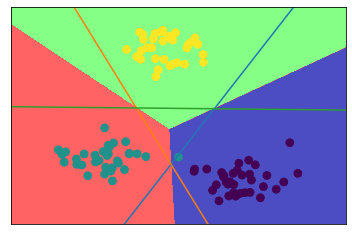

In [37]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
plt.scatter(X[:, 0], X[:, 1], c=y, s=60)
line = np.linspace(-15, 15)
for coef, intercept in zip(linear_svm.coef_, linear_svm.intercept_):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1])

Confusion Matrix

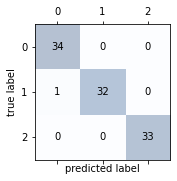

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        34
           1       1.00      0.97      0.98        33
           2       1.00      1.00      1.00        33

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



In [38]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

linear_svm = LinearSVC().fit(X, y)
y_pred = linear_svm.predict(X)
confmat = confusion_matrix(y_true=y, y_pred=y_pred)
#print(confmat)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()


from sklearn.metrics import classification_report
print(classification_report(y, y_pred))

## Example 4 Multi-Class Text Classification

### Optional Exercise (exercise at home).

Taken from here: https://datascienceplus.com/multi-class-text-classification-with-scikit-learn/

There are lots of applications of text classification in the commercial world. For example, news stories are typically organized by topics; content or products are often tagged by categories; users can be classified into cohorts based on how they talk about a product or brand online. However, the vast majority of text classification articles and tutorials on the internet are binary text classification such as email spam filtering (spam vs. ham), sentiment analysis (positive vs. negative). 

In most cases, our real-world problem is much more complicated than that. Therefore, this is what we are going to do today: Classifying Consumer Finance Complaints into 12 pre-defined classes. Given a new complaint comes in, we want to assign it to one of 12 categories. The classifier makes the assumption that each new complaint is assigned to one and only one category. This is multi-class text classification problem. 

## Homework 4. Fruit Classifier (per SLT, 15 pts, due 10 Aug 2021, 10 pm)

Taken from Susan Li: https://towardsdatascience.com/solving-a-simple-classification-problem-with-python-fruits-lovers-edition-d20ab6b071d2

The fruits dataset was created by Dr. Iain Murray from University of Edinburgh. He bought a few dozen oranges, lemons and apples of different varieties, and recorded their measurements in a table. And then the professors at University of Michigan formatted the fruits data slightly. See "Fruits Classifier.ipynb" for details.

Use our notebooks to create the following:

1. Histogram plot (fruits of each kind, 2 pts) .

2. Scatter plot (2 pts).

3. Implement kNN, Logistic Regression (L1, L2 regularization) and LinearSVM (L1, L2 regularization) and in table form list the test accuracy, optimal hyperparameter, top predictor. (11 pts)